In [2]:
from sklearn.datasets import load_iris, load_diabetes, load_digits, load_wine, load_breast_cancer
import pandas as pd
import numpy as np


TOY_SETS = {'iris' : load_iris,
            'diabates' : load_diabetes,
            'digits': load_digits,
            'wine' : load_wine,
            'breast_cancer' : load_breast_cancer}

PATHS = ['inputs/hotel_bookings.csv']


In [3]:
!pwd

/Users/nils/UNI/misc


In [4]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

def csv_to_df(path):
    return pd.read_csv(path)

In [6]:
TOY_SET_NAME = 'iris'
df = sklearn_to_df(TOY_SETS[TOY_SET_NAME]())
dfs = {name : sklearn_to_df(TOY_SETS[name]()) for name in TOY_SETS.keys()} 

In [61]:
df = csv_to_df(PATHS[0])
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


### Pandas

In [8]:
def one_hot_encode(feat_names, df):
    return pd.get_dummies(data = df, columns = feat_names)

In [9]:
cat_feat_names = ['deposit_type', 'arrival_date_month', 'reservation_status']
one_hot_encode(cat_feat_names, df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,1,0
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,1,0,0,0,0,0,0,0,1,0
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,1,0
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,1,0
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,35,30,2,5,2,0.0,...,0,0,0,0,0,0,0,0,1,0
119386,City Hotel,0,102,2017,35,31,2,5,3,0.0,...,0,0,0,0,0,0,0,0,1,0
119387,City Hotel,0,34,2017,35,31,2,5,2,0.0,...,0,0,0,0,0,0,0,0,1,0
119388,City Hotel,0,109,2017,35,31,2,5,2,0.0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
def impute(df, column_to_method):
    '''
    imputes nans in df according to mapping in column to method
    '''
    return df.fillna(column_to_method)

In [11]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
replacement_map = {'country' : 'None', 'company' : 'None', 'agent' : 'None', 'children' : 0}
impute(df, replacement_map)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,None,None,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,None,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,None,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,None,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,None,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,None,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,None,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
def drop_cols_with_nans(df, threshold):
    '''Drops columns with share of nans greater than threshold
    '''
    return df.dropna(thresh = threshold)

In [14]:
def normalize(df, num_feat_names):
    df[num_feat_names] = (df[num_feat_names] - df[num_feat_names].mean()) / df[num_feat_names].std()
    return df


In [15]:
normalize(df, ['is_canceled','lead_time'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,-0.767037,2.227042,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,-0.767037,5.923360,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,-0.767037,-0.907810,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,-0.767037,-0.851664,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,-0.767037,-0.758086,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,-0.767037,-0.018822,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,-0.767037,-0.655151,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,-0.767037,0.046682,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [16]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,-0.767037,2.227042,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,-0.767037,5.923360,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,-0.767037,-0.907810,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,-0.767037,-0.851664,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,-0.767037,-0.758086,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,-0.767037,-0.018822,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,-0.767037,-0.655151,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,-0.767037,0.046682,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [17]:
def get_categorical(names, df, n_levels = 5):
    pass




In [18]:
###Get summary statistics of df
def get_stats(df):
    return df.describe()

In [19]:
###sort values by column
def sort_values(df, feature_names):
    return df.sort_values(by = feature_names)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,-0.767037,2.227042,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,-0.767037,5.923360,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,-0.767037,-0.907810,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,-0.767037,-0.851664,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [1]:
#select column

df[feature_names]
#select row slice by index. Default index is 1...n
df[start:end]
#select by value 
df.loc[value] df.loc[index[i:i+n]]
#or row by value
df.loc[value, [column_1, column_2......]]
###apply
df.apply(function)

NameError: name 'df' is not defined

In [23]:
#select by row names
df[['is_canceled','lead_time','arrival_date_year']]

,is_canceled,lead_time,arrival_date_year
0,-0.767037,2.227042,2015
1,-0.767037,5.923360,2015
2,-0.767037,-0.907810,2015
3,-0.767037,-0.851664,2015
4,-0.767037,-0.842306,2015
...,...,...,...
119385,-0.767037,-0.758086,2017
119386,-0.767037,-0.018822,2017
119387,-0.767037,-0.655151,2017
119388,-0.767037,0.046682,2017


In [24]:
#select by slice
start, end = 5, 19
df[start:end]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,-0.767037,-0.973315,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,-0.767037,-0.889095,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1.303707,-0.177904,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1.303707,-0.271482,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22
10,Resort Hotel,1.303707,-0.758086,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Canceled,2015-06-23
11,Resort Hotel,-0.767037,-0.645793,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,145.00,0,0,Check-Out,2015-07-05
12,Resort Hotel,-0.767037,-0.336986,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
13,Resort Hotel,-0.767037,-0.804875,2015,July,27,1,0,4,2,...,No Deposit,241.0,NaN,0,Transient,154.77,0,1,Check-Out,2015-07-05
14,Resort Hotel,-0.767037,-0.627077,2015,July,27,1,0,4,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,2015-07-05


In [25]:
#slice and column names
df[['is_canceled','lead_time','arrival_date_year']][start:end]

,is_canceled,lead_time,arrival_date_year
5,-0.767037,-0.842306,2015
6,-0.767037,-0.973315,2015
7,-0.767037,-0.889095,2015
8,1.303707,-0.177904,2015
9,1.303707,-0.271482,2015
10,1.303707,-0.758086,2015
11,-0.767037,-0.645793,2015
12,-0.767037,-0.336986,2015
13,-0.767037,-0.804875,2015
14,-0.767037,-0.627077,2015


In [27]:
#select by value
value = 2015
df.loc[value, ['arrival_date_year']]

arrival_date_year    2015
Name: 2015, dtype: object

In [29]:
#select by index
index = 5
index_2 = 7
df.iloc[index:index_2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,-0.767037,-0.973315,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [30]:
#slicing by column index
df.iloc[:, index:index_2]

,arrival_date_week_number,arrival_date_day_of_month
0,27,1
1,27,1
2,27,1
3,27,1
4,27,1
...,...,...
119385,35,30
119386,35,31
119387,35,31
119388,35,31


In [36]:
#boolean indexing
df[df['arrival_date_week_number'] > 52]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3622,Resort Hotel,-0.767037,-0.393133,2015,December,53,27,2,0,2,...,No Deposit,241.0,NaN,0,Transient,33.26,0,0,Check-Out,2015-12-29
3623,Resort Hotel,1.303707,-0.683224,2015,December,53,27,2,0,1,...,No Deposit,250.0,NaN,0,Transient,80.00,0,0,No-Show,2015-12-27
3624,Resort Hotel,-0.767037,-0.393133,2015,December,53,27,2,0,2,...,No Deposit,241.0,NaN,0,Transient,39.26,1,1,Check-Out,2015-12-29
3625,Resort Hotel,1.303707,-0.720655,2015,December,53,27,2,2,2,...,No Deposit,250.0,NaN,0,Transient,75.00,0,1,Canceled,2015-12-22
3626,Resort Hotel,1.303707,-0.196620,2015,December,53,27,2,3,2,...,No Deposit,240.0,NaN,0,Transient,71.28,0,0,Canceled,2015-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104142,City Hotel,-0.767037,-0.814233,2016,December,53,30,2,5,2,...,No Deposit,9.0,NaN,0,Transient,90.34,0,1,Check-Out,2017-01-06
104145,City Hotel,-0.767037,0.683010,2016,December,53,30,2,5,0,...,No Deposit,NaN,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06
104147,City Hotel,-0.767037,0.027966,2016,December,53,31,2,5,2,...,No Deposit,28.0,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07
104216,City Hotel,-0.767037,1.927593,2016,December,53,27,2,10,2,...,No Deposit,9.0,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08


In [44]:
#transform column based on function
df[['lead_time','arrival_date_day_of_month']].apply(lambda x: np.exp(x))

,lead_time,arrival_date_day_of_month
0,9.272396,2.718282e+00
1,373.665084,2.718282e+00
2,0.403407,2.718282e+00
3,0.426704,2.718282e+00
4,0.430716,2.718282e+00
...,...,...
119385,0.468562,1.068647e+13
119386,0.981354,2.904885e+13
119387,0.519364,2.904885e+13
119388,1.047789,2.904885e+13


In [47]:
###merging
pd.concat([df, df[['lead_time','arrival_date_day_of_month']].apply(lambda x: np.exp(x))]) #stack on top
pd.concat([df, df[['lead_time','arrival_date_day_of_month']].apply(lambda x: np.exp(x))], axis = 1) #stack on side

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time,arrival_date_day_of_month
0,Resort Hotel,-0.767037,2.227042,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,9.272396,2.718282e+00
1,Resort Hotel,-0.767037,5.923360,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,373.665084,2.718282e+00
2,Resort Hotel,-0.767037,-0.907810,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.403407,2.718282e+00
3,Resort Hotel,-0.767037,-0.851664,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.426704,2.718282e+00
4,Resort Hotel,-0.767037,-0.842306,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.430716,2.718282e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,-0.767037,-0.758086,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.468562,1.068647e+13
119386,City Hotel,-0.767037,-0.018822,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.981354,2.904885e+13
119387,City Hotel,-0.767037,-0.655151,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.519364,2.904885e+13
119388,City Hotel,-0.767037,0.046682,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,1.047789,2.904885e+13


In [51]:
#group by
df.groupby('hotel').median()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,,
City Hotel,-0.767037,-0.280840,2016.0,27.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,91.0,0.0,99.9,0.0,0.0
Resort Hotel,-0.767037,-0.439922,2016.0,28.0,16.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,223.0,0.0,75.0,0.0,0.0


In [58]:
def plot_feat_importances(list: feat_importances):
    pass

def waterfall(list: feat_importances):
    pass

pandas.core.frame.DataFrame

### Sklearn

In [346]:
open_ml_dataset_names = ['titanic', 'credit-g', 'liver-disorders', 'cholesterol', 'spambase']

In [347]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV

In [448]:
from sklearn.datasets import fetch_openml
OPEN_ML_DS_NAME = 'cholesterol'
df = sklearn_to_df(fetch_openml(OPEN_ML_DS_NAME, version=1, as_frame=True, return_X_y=False))
df = dfs['breast_cancer']

In [449]:
TARGET_NAME = 'target'
FEATURE_NAMES = list(df.columns)
FEATURE_NAMES.remove(TARGET_NAME)
numeric_feature_names = list(df[FEATURE_NAMES].select_dtypes('number').columns)
categoric_feature_names = list( set(df[FEATURE_NAMES].columns) - set(numeric_feature_names))
N_levels = 15
is_classification = len(df[TARGET_NAME].unique()) <= N_levels
is_classification
print(f'{"Regression Problem" if not is_classification else "Classification Problem"}, \
      Target Name: {TARGET_NAME}, Data Set: {OPEN_ML_DS_NAME}')

Classification Problem,       Target Name: target, Data Set: cholesterol


In [450]:
#Create pipeline
imputer = SimpleImputer()
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'mean')), ('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore')
preprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, numeric_feature_names),
                                                 ('categoric', categorical_transformer, categoric_feature_names)]
                                )

estimator = LogisticRegression() if is_classification else LinearRegression()

pipe = Pipeline(steps = [('preprocessing', preprocessor), ('estimator' , estimator)])

pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                           

In [451]:
X = df[FEATURE_NAMES]
y = df[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [452]:
from sklearn.metrics import classification_report, plot_roc_curve
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print(classification_report(y_test, y_hat)) if is_classification else print (regression_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



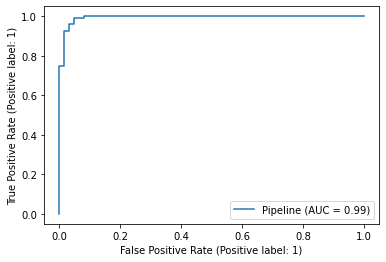

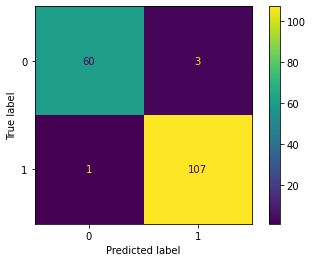

In [453]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
if is_classification and len(y_test.unique()) <= 2:
    RocCurveDisplay.from_estimator(pipe, X_test, y_test)
if is_classification:
    cm = confusion_matrix(y_test, y_hat, labels = pipe.named_steps['estimator'].classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.named_steps['estimator'].classes_).plot()

In [454]:
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro'] if is_classification else ['r2', 'explained_variance',
                                                                         'neg_mean_absolute_error',
                                                                        'neg_mean_absolute_percentage_error']
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe, X, y, scoring=scoring, cv = 10)

In [472]:
pipe.feature_names_in_

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

In [473]:
pipe.named_steps['estimator'].coef_

array([[-0.2832411 , -0.59209915, -0.2972598 , -0.36775202, -0.14104012,
         0.41628173, -0.66565913, -0.74229481, -0.39025773,  0.04165549,
        -1.38128497,  0.12860473, -0.96157455, -0.96323792,  0.25458711,
         0.9235784 , -0.11136139, -0.36267771,  0.1433099 ,  0.89208519,
        -0.86845879, -0.88672476, -0.75544795, -0.84696401, -0.56052756,
         0.17498866, -0.83309241, -1.05993436, -0.47430265, -0.60872579]])

In [455]:
score_df = pd.DataFrame(scores)
score_df = pd.concat([score_df, score_df.agg(['mean'])]) 
pd.DataFrame(score_df.loc['mean'])

,mean
fit_time,0.029783
score_time,0.006304
test_precision_macro,0.982276
test_recall_macro,0.976815


In [471]:
importances = {name : value for name, value in zip(pipe.feature_names_in_, pipe.named_steps['estimator'].coef_)} if \
             (isinstance(pipe.named_steps['estimator'], LogisticRegression) \
              or isinstance(pipe.named_steps['estimator'], LinearRegression)) \
                else None
#importances = importances# if not isinstance(list(importances.values())[0], np.ndarray) else \
                #{k : np.mean(v) for k,v in importances.items()}
importances = dict(sorted(importances.items(), key=lambda item: -item[1]))
importances


{'mean radius': array([-0.2832411 , -0.59209915, -0.2972598 , -0.36775202, -0.14104012,
         0.41628173, -0.66565913, -0.74229481, -0.39025773,  0.04165549,
        -1.38128497,  0.12860473, -0.96157455, -0.96323792,  0.25458711,
         0.9235784 , -0.11136139, -0.36267771,  0.1433099 ,  0.89208519,
        -0.86845879, -0.88672476, -0.75544795, -0.84696401, -0.56052756,
         0.17498866, -0.83309241, -1.05993436, -0.47430265, -0.60872579])}

In [469]:
importances = {name : value for name, value in zip(pipe.feature_names_in_, pipe.named_steps['estimator'].coef_)} if \
             (isinstance(pipe.named_steps['estimator'], LogisticRegression) \
              or isinstance(pipe.named_steps['estimator'], LinearRegression)) \
                else None
importances

{'mean radius': array([-0.2832411 , -0.59209915, -0.2972598 , -0.36775202, -0.14104012,
         0.41628173, -0.66565913, -0.74229481, -0.39025773,  0.04165549,
        -1.38128497,  0.12860473, -0.96157455, -0.96323792,  0.25458711,
         0.9235784 , -0.11136139, -0.36267771,  0.1433099 ,  0.89208519,
        -0.86845879, -0.88672476, -0.75544795, -0.84696401, -0.56052756,
         0.17498866, -0.83309241, -1.05993436, -0.47430265, -0.60872579])}

TypeError: only size-1 arrays can be converted to Python scalars

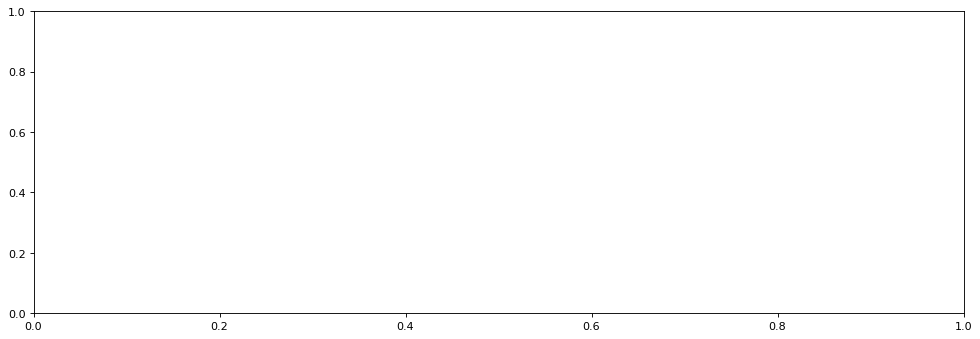

In [470]:
plt.figure(figsize=(15, 5), dpi=80)
plt.bar(range(len(importances)), list(importances.values()), align='center')
plt.xticks(range(len(importances)), list(importances.keys()), rotation = 45)
plt.title('Feature Importances / Coefs. Mean for multiclass')
plt.xlabel('Feature Name')
plt.show()

In [ ]:
if is_classification:
    plt.figure(figsize=(15, 5), dpi=80)
    plt.bar(range(len(importances)), [np.exp(e) for e in importances.values()], align='center')
    plt.xticks(range(len(importances)), list(importances.keys()), rotation = 45)
    plt.title('Log odds')
    plt.xlabel('Feature Name')
    plt.show()

In [462]:
pipe.named_steps['estimator'].coef_

array([[-0.2832411 , -0.59209915, -0.2972598 , -0.36775202, -0.14104012,
         0.41628173, -0.66565913, -0.74229481, -0.39025773,  0.04165549,
        -1.38128497,  0.12860473, -0.96157455, -0.96323792,  0.25458711,
         0.9235784 , -0.11136139, -0.36267771,  0.1433099 ,  0.89208519,
        -0.86845879, -0.88672476, -0.75544795, -0.84696401, -0.56052756,
         0.17498866, -0.83309241, -1.05993436, -0.47430265, -0.60872579]])

In [266]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')